In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [11]:
# load dataset into csv
df = pd.read_csv(url, names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'])

In [12]:
df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Standardize the Data
PCA is effected by scale so you need to scale the features in your data before applying PCA. Use StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms. If you want to see the negative effect not scaling your data can have, scikit-learn has a section on the effects of not standardizing your data.

In [16]:
from sklearn.preprocessing import StandardScaler
features = ['sepal_length','sepal_width','petal_length','petal_width']
# seperating out features
x = df.loc[:, features].values
y = df.loc[:, ['target']].values

In [15]:
type(x)

numpy.ndarray

In [17]:
type(y)

numpy.ndarray

In [18]:
# standardize data
x = StandardScaler().fit_transform(x)

In [19]:
x

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

PCA Projection to 2D
The original data has 4 columns (sepal length, sepal width, petal length, and petal width). In this section, the code projects the original data which is 4 dimensional into 2 dimensions. I should note that after dimensionality reduction, there usually isn’t a particular meaning assigned to each principal component. The new components are just the two main dimensions of variation.

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalcomponents = pca.fit_transform(x)
principaldf = pd.DataFrame(data = principalcomponents, columns = ['pc1', 'pc2'])

In [21]:
principaldf

,pc1,pc2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


In [22]:
finaldf = pd.concat([principaldf, df['target']], axis = 1)

In [23]:
finaldf

,pc1,pc2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


Visualize 2D Projection
This section is just plotting 2 dimensional data. Notice on the graph below that the classes seem well separated from each other.

Visualize 2D Projection
This section is just plotting 2 dimensional data. Notice on the graph below that the classes seem well separated from each other.

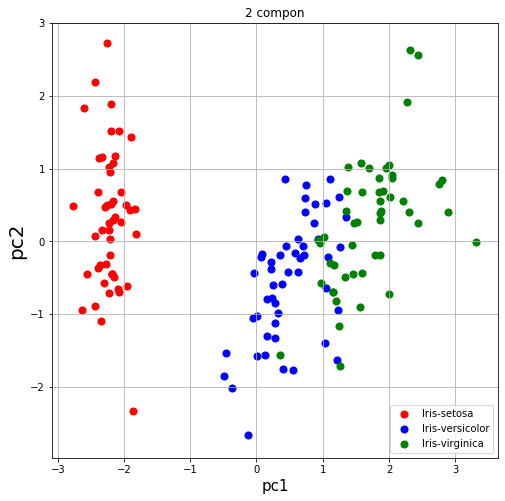

In [26]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('pc1', fontsize = 15)
ax.set_ylabel('pc2', fontsize = 20)
ax.set_title('2 compon')
targets =  ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors =['r', 'b', 'g']
for (target, color) in zip(targets, colors):
    indicesToKeep = finaldf['target'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'pc1'], finaldf.loc[indicesToKeep, 'pc2'], c = color, s = 50)
    ax.legend(targets)
    ax.grid()

Explained Variance
The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 4 dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this. By using the attribute explained_variance_ratio_, you can see that the first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance. Together, the two components contain 95.80% of the information.

In [27]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

PCA to Speed-up Machine Learning Algorithms
One of the most important applications of PCA is for speeding up machine learning algorithms. Using the IRIS dataset would be impractical here as the dataset only has 150 rows and only 4 feature columns. The MNIST database of handwritten digits is more suitable as it has 784 feature columns (784 dimensions), a training set of 60,000 examples, and a test set of 10,000 examples.
Download and Load the Data
You can also add a data_home parameter to fetch_mldata to change where you download the data.

In [29]:
from sklearn import datasets
digits = datasets.load_digits()

In [33]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

The images that you downloaded are contained in mnist.data and has a shape of (70000, 784) meaning there are 70,000 images with 784 dimensions (784 features).
The labels (the integers 0–9) are contained in mnist.target. The features are 784 dimensional (28 x 28 images) and the labels are simply numbers from 0–9.

In [34]:
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(digits.data, digits.target, test_size = 1/7.0, random_state = 0)

In [39]:
train_img.data

In [40]:
 test_img.data

In [42]:
 train_lbl

array([5, 7, 0, ..., 7, 7, 8])

In [44]:
test_lbl

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 5, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 5, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 7, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 7,
       3, 4, 8, 9, 7, 9, 8, 2, 6, 5, 2, 5, 8, 4, 8, 7, 0, 6, 1, 5, 9, 9,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 8, 7, 6, 7, 6, 5, 6, 0, 8, 8, 9, 8, 6, 1, 0, 4, 1, 6,
       3, 8, 6, 7, 4, 5, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 8, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 9, 2, 1, 4, 2, 1, 6, 8, 9,
       2, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 2, 2, 0, 7, 6, 1, 1,
       9, 7, 2, 7, 8, 5, 5, 7, 5, 2, 3, 7, 2, 7, 5])

Standardize the Data
The text in this paragraph is almost an exact copy of what was written earlier. PCA is effected by scale so you need to scale the features in the data before applying PCA. You can transform the data onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms. StandardScaler helps standardize the dataset’s features. Note you fit on the training set and transform on the training and test set. If you want to see the negative effect not scaling your data can have, scikit-learn has a section on the effects of not standardizing your data.

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#fit on traindata
sc.fit(train_img)
train_img = sc.transform(train_img)
test_img = sc.transform(test_img)

Import and Apply PCA
Notice the code below has .95 for the number of components parameter. It means that scikit-learn choose the minimum number of principal components such that 95% of the variance is retained.

In [50]:
from sklearn.decomposition import PCA
pca = PCA(.95)


In [51]:
#Fit PCA on training set. Note: you are fitting PCA on the training set only.

In [52]:
pca.fit(train_img)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [53]:
#Apply the mapping (transform) to both the training set and the test set.

In [54]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

In [55]:
train_img

array([[-1.62409335e+00,  2.27929151e+00,  1.13916327e+00, ...,
         7.44574459e-02, -3.28020824e-03, -4.81721060e-01],
       [ 3.08304691e+00,  4.51318643e+00, -8.59686917e-01, ...,
        -4.72648272e-01, -8.68446151e-01, -3.33611625e-01],
       [ 3.24335579e+00, -3.45051597e-01, -2.82493687e+00, ...,
        -3.61937086e-01,  5.59562417e-01, -5.86497056e-01],
       ...,
       [ 1.59101441e-01,  1.95235316e+00,  2.10135355e+00, ...,
         5.99329227e-01,  7.15435807e-02, -1.76413785e-01],
       [ 1.37505827e+00,  3.24980448e+00,  5.81883011e-01, ...,
         2.04230796e-01, -9.48531790e-01,  3.37607004e-01],
       [-1.76423803e+00, -3.92221669e-01,  8.80606019e-02, ...,
         5.19950252e-01,  8.55010100e-02,  4.32882572e-01]])

In [56]:
test_img

array([[-3.64691306e+00,  3.85517508e-01,  8.73333309e-01, ...,
        -1.60710343e-02,  9.52336256e-02, -3.08382083e-01],
       [-2.67697891e+00,  8.25246858e-01,  8.74628417e-01, ...,
        -6.18878817e-01,  7.92302663e-03,  2.22675653e-01],
       [-6.10186661e+00, -9.82596269e-01,  1.84397505e+00, ...,
         7.48713393e-01,  2.40160304e-01,  2.89275913e-01],
       ...,
       [-5.48393185e+00, -2.61503923e+00,  1.83536758e+00, ...,
         2.46567580e-03, -3.48296884e-01, -1.87637630e-01],
       [ 1.35217235e+00,  2.02982560e+00,  4.93939003e-01, ...,
        -5.49870180e-02,  1.02898388e-02, -1.09434160e-01],
       [-4.99505005e-01, -8.79574069e-01, -3.86206163e+00, ...,
         2.31457764e-01,  1.27703980e-01, -1.90430963e-01]])

Apply Logistic Regression to the Transformed Data
Step 1: Import the model you want to use
In sklearn, all machine learning models are implemented as Python classes

In [59]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'lbfgs')

Step 3: Training the model on the data, storing the information learned from the data
Model is learning the relationship between digits and labels

In [61]:
lr.fit(train_img, train_lbl)

C:\Users\vinay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Step 4: Predict the labels of new data (new images)
Uses the information the model learned during the model training process
The code below predicts for one observation

In [62]:
lr.predict(test_img[0].reshape(1, -1))

array([2])

The code below predicts for multiple observations at once


In [64]:
# Predict for One Observation (image)
lr.predict(test_img[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [66]:
lr.score(test_img, test_lbl)

0.9571984435797666

Timing of Fitting Logistic Regression after PCA
The whole point of this section of the tutorial was to show that you can use PCA to speed up the fitting of machine learning algorithms. The table below shows how long it took to fit logistic regression on my MacBook after using PCA (retaining different amounts of variance each time).

In [67]:
pd.DataFrame(data = [[1.00, 784, 48.94, .9158],
                     [.99, 541, 34.69, .9169],
                     [.95, 330, 13.89, .92],
                     [.90, 236, 10.56, .9168],
                     [.85, 184, 8.85, .9156]], 
             columns = ['Variance Retained',
                      'Number of Components', 
                      'Time (seconds)',
                      'Accuracy'])

,Variance Retained,Number of Components,Time (seconds),Accuracy
0,1.00,784,48.94,0.9158
1,0.99,541,34.69,0.9169
2,0.95,330,13.89,0.9200
3,0.90,236,10.56,0.9168
4,0.85,184,8.85,0.9156
